# Training and Visualizing a Decision Tree

In [37]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

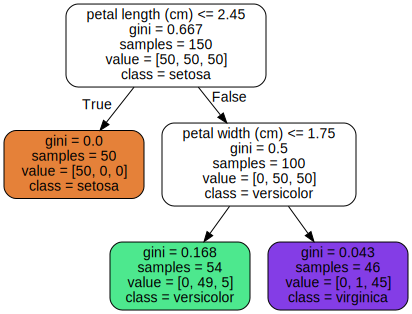

In [38]:
from sklearn.tree import export_graphviz
from graphviz import Source

data = export_graphviz(
    tree_clf,
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
Source(data)

In [ ]:
# export_graphviz(
#     tree_clf,
#     out_file="exports/iris_tree.dot",
#     feature_names=["petal length (cm)", "petal width (cm)"],
#     class_names=iris.target_names,
#     rounded=True,
#     filled=True
# )
# Source.from_file("exports/iris_tree.dot")

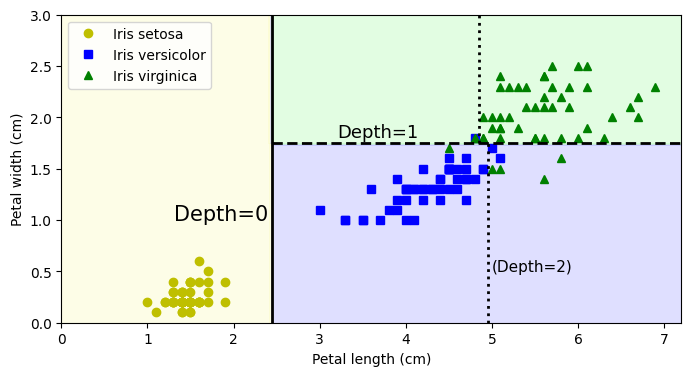

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

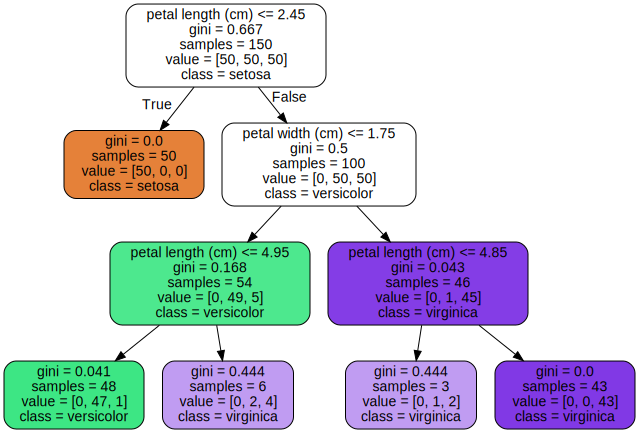

In [63]:
data = export_graphviz(
    tree_clf_deeper,
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
Source(data)

In [62]:
tree_clf_deeper.tree_.threshold

array([ 2.44999999, -2.        ,  1.75      ,  4.95000005, -2.        ,
       -2.        ,  4.85000014, -2.        , -2.        ])

# Estimating class probabilities

In [76]:
# value / samples (as for computing Gini impurity)
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [75]:
tree_clf.predict([[5, 1.5]])

array([1])

# Gini impurity or Entropy?

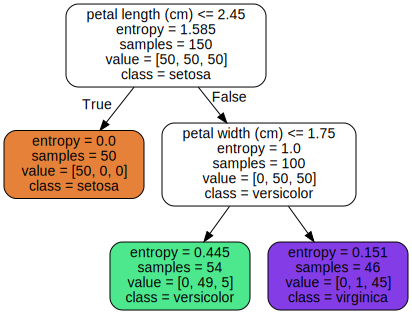

In [81]:
entropy_tree_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
entropy_tree_clf.fit(X_iris, y_iris)

data = export_graphviz(
    entropy_tree_clf,
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
Source(data)